In [43]:
%matplotlib inline

import os
import json
import time
import requests


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('./data/clustered_events.csv')
data.dtypes

Unnamed: 0          int64
UPA                 int64
EventDate          object
State               int64
Latitude          float64
Longitude         float64
Primary NA          int64
Hospitaliz          int64
Amputation          int64
Nature              int64
BodyPart            int64
Part_of _1         object
Event               int64
Source              int64
NAMELSAD           object
Month               int64
Year                int64
InsideUS            int64
Day                 int64
NAMELSAD_Codes      int64
Cluster             int64
dtype: object

In [9]:
data.head()

,Unnamed: 0,UPA,EventDate,State,Latitude,Longitude,Primary NA,Hospitaliz,Amputation,Nature,...,Part_of _1,Event,Source,NAMELSAD,Month,Year,InsideUS,Day,NAMELSAD_Codes,Cluster
0,0,1228909,2017-06-15,27,41.83,-96.71,311119,0,1,1311,...,"Finger(s), fingernail(s), n.e.c.",6412,3714,Cuming County,6,2017,1,15,332,1
1,1,1238273,2017-06-24,27,41.79,-96.70,311512,0,1,1311,...,Fingertip(s),6411,3421,Cuming County,6,2017,1,24,332,1
2,2,1384150,2018-09-17,27,41.79,-96.70,311512,1,0,1729,...,BODY SYSTEMS,531,9262,Cuming County,9,2018,1,17,332,1
3,3,930752,2015-01-06,27,40.98,-96.60,236220,1,0,111,...,Ankle(s),40,660,Lancaster County,1,2015,1,6,698,3
4,4,933523,2015-01-20,27,40.87,-96.62,331511,1,0,111,...,"Leg(s), unspecified",6260,3460,Lancaster County,1,2015,1,20,698,1


In [10]:
data.drop(columns=['Unnamed: 0'],inplace=True)
data.set_index('UPA',inplace=True)
data.head()

,EventDate,State,Latitude,Longitude,Primary NA,Hospitaliz,Amputation,Nature,BodyPart,Part_of _1,Event,Source,NAMELSAD,Month,Year,InsideUS,Day,NAMELSAD_Codes,Cluster
UPA,,,,,,,,,,,,,,,,,,,
1228909,2017-06-15,27,41.83,-96.71,311119,0,1,1311,4429,"Finger(s), fingernail(s), n.e.c.",6412,3714,Cuming County,6,2017,1,15,332,1
1238273,2017-06-24,27,41.79,-96.70,311512,0,1,1311,4422,Fingertip(s),6411,3421,Cuming County,6,2017,1,24,332,1
1384150,2018-09-17,27,41.79,-96.70,311512,1,0,1729,6,BODY SYSTEMS,531,9262,Cuming County,9,2018,1,17,332,1
930752,2015-01-06,27,40.98,-96.60,236220,1,0,111,52,Ankle(s),40,660,Lancaster County,1,2015,1,6,698,3
933523,2015-01-20,27,40.87,-96.62,331511,1,0,111,510,"Leg(s), unspecified",6260,3460,Lancaster County,1,2015,1,20,698,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39504 entries, 1228909 to 1392712
Data columns (total 19 columns):
EventDate         39504 non-null object
State             39504 non-null int64
Latitude          39504 non-null float64
Longitude         39504 non-null float64
Primary NA        39504 non-null int64
Hospitaliz        39504 non-null int64
Amputation        39504 non-null int64
Nature            39504 non-null int64
BodyPart          39504 non-null int64
Part_of _1        39504 non-null object
Event             39504 non-null int64
Source            39504 non-null int64
NAMELSAD          39504 non-null object
Month             39504 non-null int64
Year              39504 non-null int64
InsideUS          39504 non-null int64
Day               39504 non-null int64
NAMELSAD_Codes    39504 non-null int64
Cluster           39504 non-null int64
dtypes: float64(2), int64(14), object(3)
memory usage: 6.0+ MB


## Plotting out the results

After verifying that our clustered dataset loaded correctly, 

In [17]:
def matplotlib3d(data):
    df=pd.DataFrame(data)    
    
    fig = plt.figure(figsize=(30,30))
    ax = fig.add_subplot(111, projection='3d')
    x = np.array(df.iloc[:,17])
    y = np.array(df.iloc[:,4])
    z = np.array(df.iloc[:,10])

    ax.scatter(x,y,z, marker="s", c=df["Cluster"], s=40, cmap="RdBu")

    plt.show()

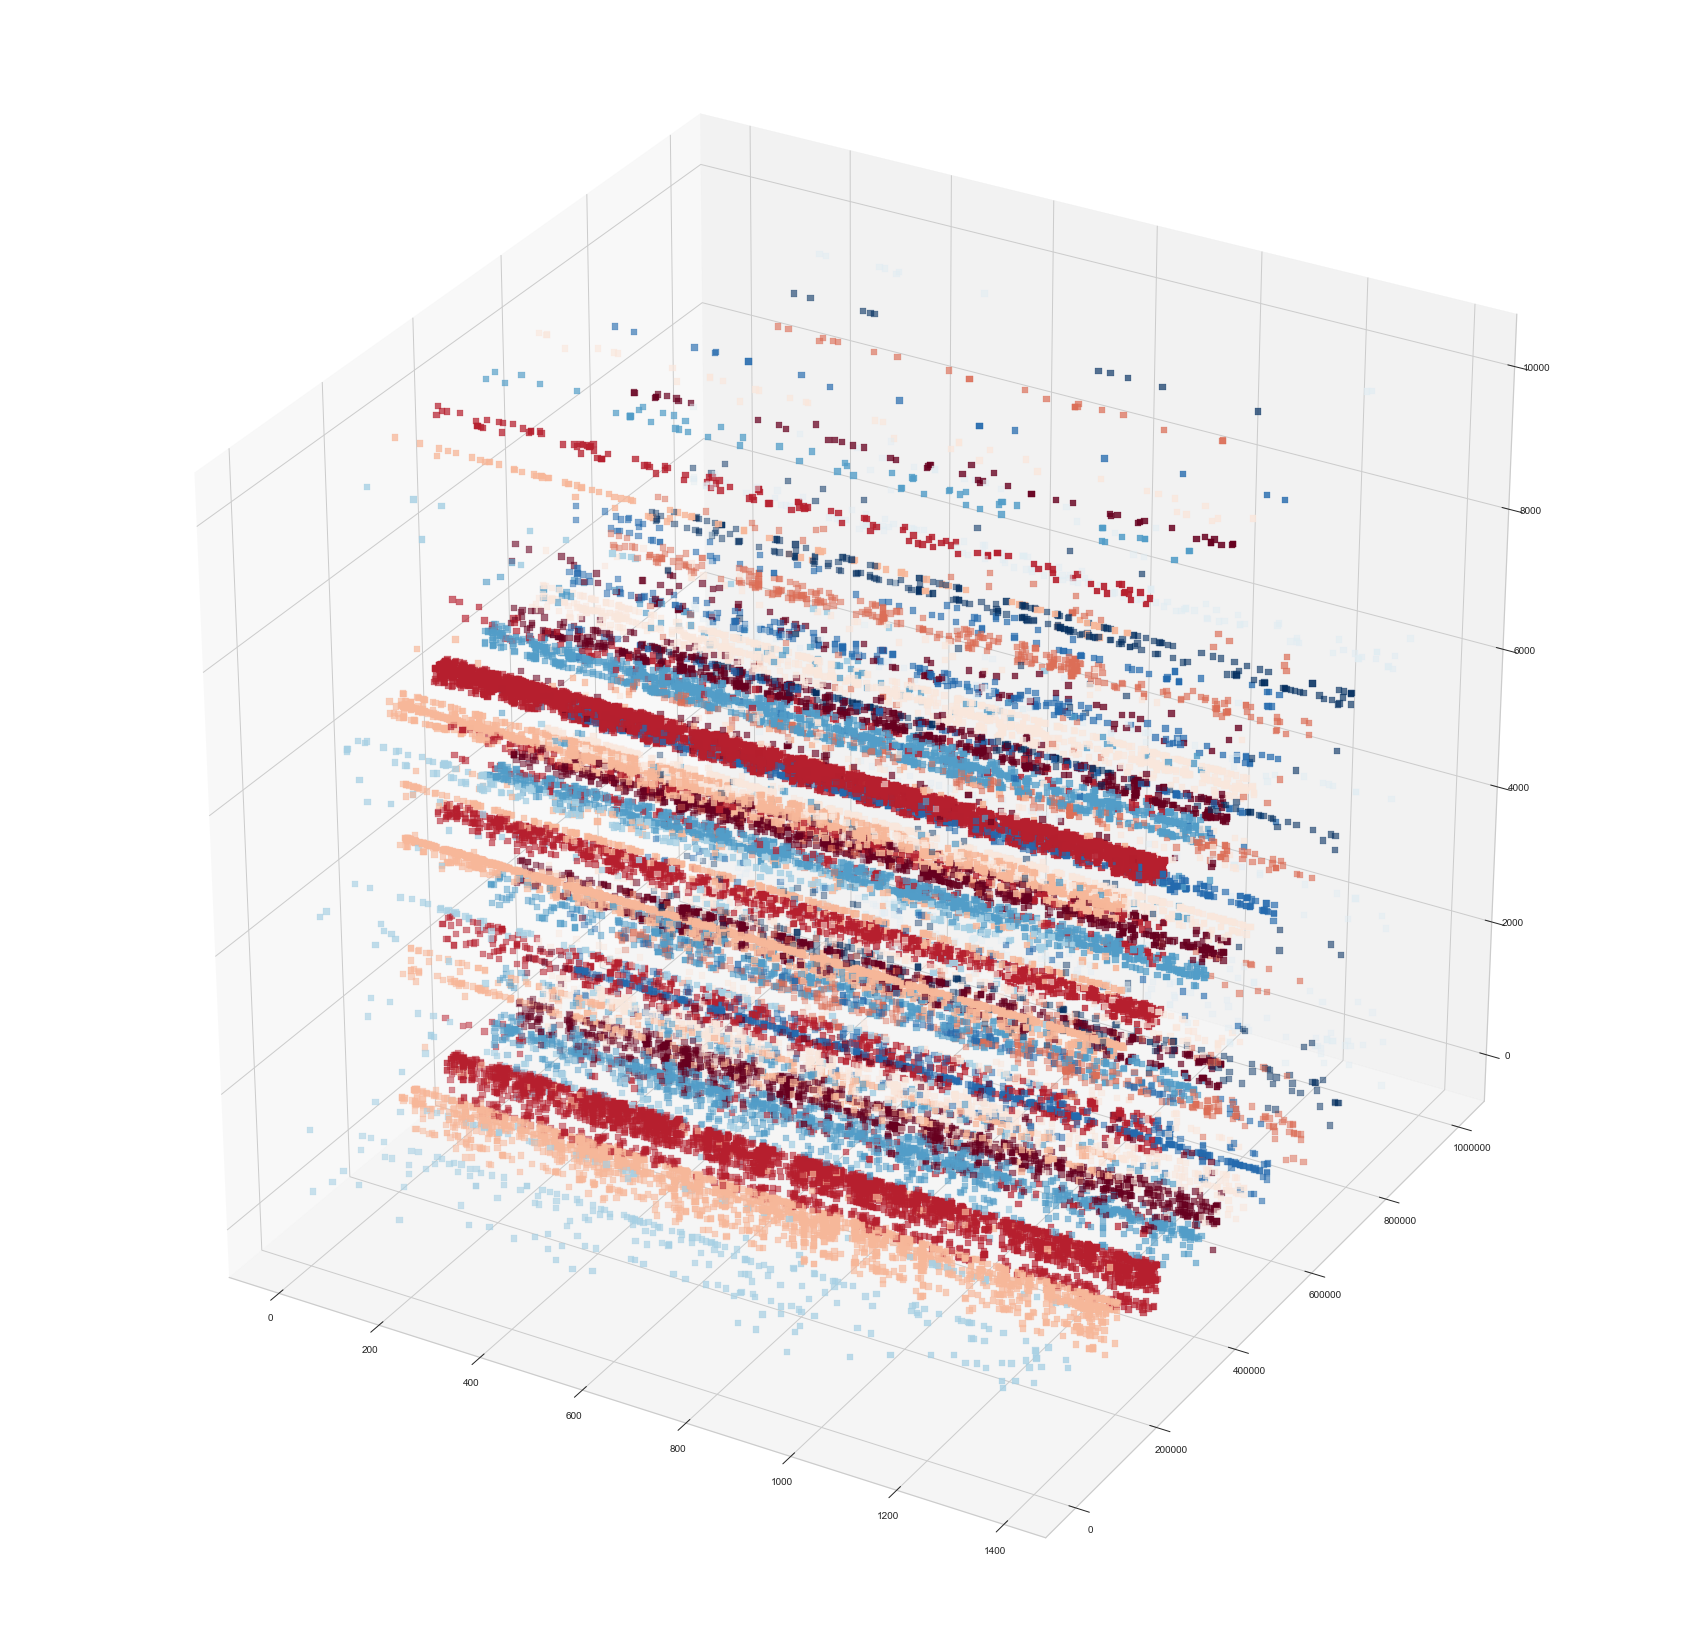

In [18]:
matplotlib3d(data)

In [21]:
Eventcount = data.groupby(['Cluster','Event'])['Event'].agg('count').to_frame('Event_Counts').reset_index() 
Countycount = data.groupby(['Cluster','NAMELSAD','Event'])['Event'].agg('count').to_frame('Event_Counts').reset_index()

In [22]:
Countycount.head()

,Cluster,NAMELSAD,Event,Event_Counts
0,0,Ada County,422,3
1,0,Ada County,620,1
2,0,Ada County,4213,1
3,0,Ada County,6411,1
4,0,Adair County,4330,1


In [23]:
Eventcount.head()

,Cluster,Event,Event_Counts
0,0,20,1
1,0,40,53
2,0,45,2
3,0,50,1
4,0,60,25


### What is in the Clusters?

We then excluded the rows with Event Code '9999' (Uncategorizable, Error) and any rows with a Event_Count less than 200. This yields 44 rows, spanning 6 of the 10 clusters. 

In [25]:
Eventcount.loc[(Eventcount['Event']!=9999) & (Eventcount['Event_Counts']>=200)]

,Cluster,Event,Event_Counts
34,0,422,278
42,0,531,238
51,0,642,249
141,0,4330,318
142,0,4331,254
221,1,60,230
253,1,422,271
261,1,533,401
271,1,640,389
272,1,642,1065


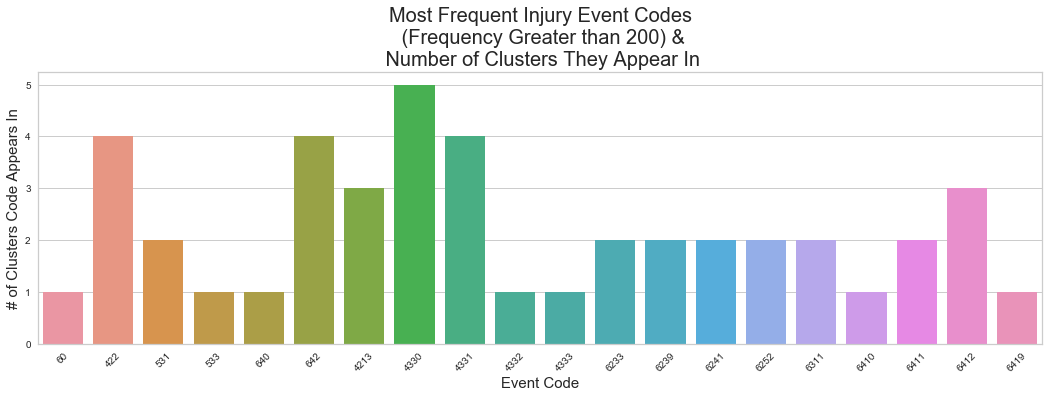

In [53]:
biggestevents=Eventcount.loc[(Eventcount['Event']!=9999) & (Eventcount['Event_Counts']>=200)]

plt.figure(figsize=[18,5])
sns.countplot(data = biggestevents, x='Event')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Event Code', fontsize=15)
plt.xticks(rotation=45, fontsize = 10)
plt.ylabel('# of Clusters Code Appears In',fontsize=15)
plt.yticks(fontsize=10)
plt.title('Most Frequent Injury Event Codes\n (Frequency Greater than 200) &\n Number of Clusters They Appear In', fontsize=20)
plt.show()

### Most Frequent Events

There seem to be several event codes that have a very large frequency. Now we investigate their prevalence throughout all 10 clusters. 

In [30]:
evenbiggerevents=Eventcount.loc[(Eventcount['Event']!=9999) & (Eventcount['Event_Counts']>=1000)]
evenbiggerevents.head()

,Cluster,Event,Event_Counts
272,1,642,1065
429,1,6411,1692
430,1,6412,2340


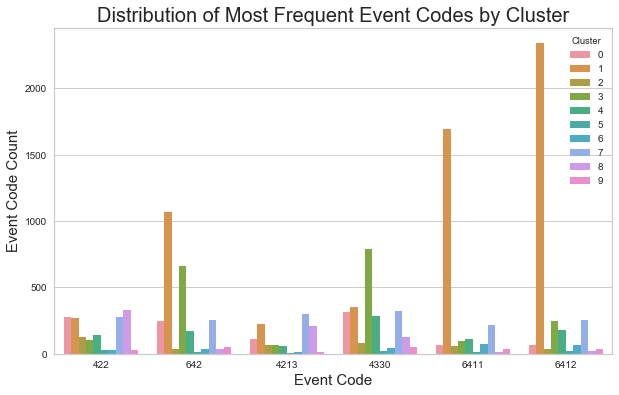

In [47]:
eventdf=Eventcount.loc[(Eventcount['Event']==642)|(Eventcount['Event']==6411)|(Eventcount['Event']==6412)|(Eventcount['Event']==422)|
              (Eventcount['Event']==4330)|(Eventcount['Event']==4213)]

plt.figure(figsize=(10, 6))
sns.barplot(x="Event", hue="Cluster", y="Event_Counts", data=eventdf)
plt.title('Distribution of Most Frequent Event Codes by Cluster',fontsize=20)
plt.xlabel('Event Code',fontsize=15)
plt.ylabel('Event Code Count', fontsize=15)
plt.show()